# PYTHON PROGRAMMING 


# 기온데이터 분석

### 1907년부터 2018년3월까지의 서울 기온 데이터를 CSV로 다운로드 한다.

### - 다운로드 파일을 미리 제공해서 폴더에 넣어두었습니다. seoul.csv 파일을 열어 보세요. encoding='cp949'

In [1]:
import csv

In [12]:
f = open('seoul.csv', 'r', encoding='cp949')

In [13]:
data = csv.reader(f)

In [14]:
len(list(data))

39927

In [15]:
f.close()

## 실습 1. (csv 라이브러리 이용) 서울이 가장 더웠던 날을 찾으세요.

## 1. 데이터를 읽어온다.
## 2. 순차적으로 최고 기온을 확인
## 3. 최고 기온이 가장 높았던 날짜를 저장
## 4. 데이터를 끝까지 다 본 후, 해당 날짜 출력

In [22]:
max_temp = -999
max_date = ''

f = open('seoul.csv', 'r', encoding='cp949')
data = csv.reader(f)
data = list(data)[1:]
for row in data :
    
    if row[-1] == '' :
        continue
    
    if float(row[-1]) > max_temp :
        max_temp = float(row[-1])
        max_date = row[0]



In [23]:
print(max_temp, max_date)

38.4 1994-07-24


## 실습 2. pandas 를 이용해서 가장 더운날을 찾아보세요.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [25]:
df = pd.read_csv('seoul.csv', encoding='cp949')

In [26]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [27]:
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,39926.0,39170.000000,39169.000000,39168.000000
mean,108.0,11.672716,7.374237,16.684921
std,0.0,10.664129,10.887584,10.996621
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.600000,-1.500000,7.100000
50%,108.0,12.900000,7.900000,18.500000
75%,108.0,21.200000,17.000000,26.200000
max,108.0,33.100000,28.800000,38.400000


In [35]:
df.loc[ df['최고기온(℃)'] == df['최고기온(℃)'].max()   ]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
31277,1994-07-24,108,33.1,28.1,38.4


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

## 실습 3. 최고기온을 기준으로,  -20도부터 45도까지 4도씩 bins로 만들어서, 히스토그램으로 보여주세요.

In [42]:
bin_range = np.arange(-20, 45+4, 4)

In [43]:
bin_range

array([-20, -16, -12,  -8,  -4,   0,   4,   8,  12,  16,  20,  24,  28,
        32,  36,  40,  44,  48])

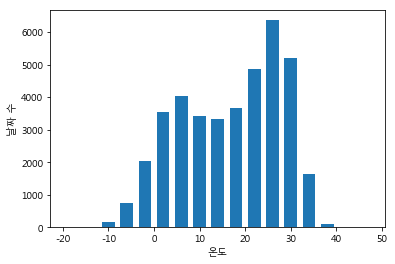

In [44]:
plt.hist(data = df, x='최고기온(℃)', bins=bin_range, rwidth=0.7)
plt.xlabel('온도')
plt.ylabel('날짜 수')
plt.show()

# 실습 4.  2017-08-01 ~ 2017-08-15 사이의 날짜별로, 최고기온을 스케터로 나타내세요.

In [46]:
start = df[ df['날짜']  == '2017-08-01'  ]

In [55]:
start_index = start.index.values[0]

In [56]:
end = df[ df['날짜']  == '2017-08-15'  ]

In [57]:
end_index = end.index.values[0]

In [61]:
new_df = df.iloc[start_index : end_index + 1]

In [62]:
new_df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
39686,2017-08-01,108,28.6,24.1,33.0
39687,2017-08-02,108,30.0,26.6,33.0
39688,2017-08-03,108,30.2,27.2,33.9
39689,2017-08-04,108,30.3,25.9,35.3
39690,2017-08-05,108,31.4,27.6,34.8
39691,2017-08-06,108,29.8,28.2,34.0
39692,2017-08-07,108,29.2,26.4,34.4
39693,2017-08-08,108,28.2,25.5,31.0
39694,2017-08-09,108,27.6,24.6,32.0
39695,2017-08-10,108,24.8,23.9,26.3


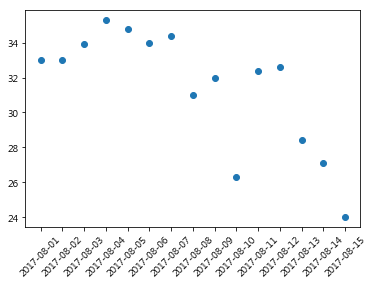

In [65]:
plt.scatter(data = new_df, x = '날짜', y = '최고기온(℃)')
plt.xticks(rotation=45)
plt.show()